In [31]:
import geopandas as gpd 
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import pandas as pd 
import contextily as ctx 
import geopandas as gpd 
import seaborn as sns
import os 
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
filtered_df = gpd.read_file(r"filtered_df.shp")
joint_tracts_zip = gpd.read_file(r"joint_tracts_zip.shp")
filtered_df.head()

# percent_ai = percent_aid_approved
# percent_pe = percent_people_approved
# average_da = average_damage
# percent_el = percenter_eligible_approved

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,...,INTPTLON,sv_zone,percent_ai,percent_pe,average_da,percent_el,eligible,applicants,gini_value,geometry
0,33901,8600000US33901,33901,16137235,7923837,12,071,080300,12071080300,1400000US12071080300,...,-081.8723830,4.0,0.462084,1.201108,2060.552692,0.403565,3759.0,1263.0,0.4748,"POLYGON ((-81.87048 26.65312, -81.86672 26.647..."
1,33901,8600000US33901,33901,16137235,7923837,12,071,001001,12071001001,1400000US12071001001,...,-081.8813712,2.0,0.462084,1.201108,2060.552692,0.403565,3759.0,1263.0,0.5069,"POLYGON ((-81.88601 26.59680, -81.89076 26.596..."
2,33901,8600000US33901,33901,16137235,7923837,12,071,001103,12071001103,1400000US12071001103,...,-081.8637435,4.0,0.462084,1.201108,2060.552692,0.403565,3759.0,1263.0,0.4466,"POLYGON ((-81.85560 26.60443, -81.85566 26.601..."
3,33901,8600000US33901,33901,16137235,7923837,12,071,001104,12071001104,1400000US12071001104,...,-081.8628220,5.0,0.462084,1.201108,2060.552692,0.403565,3759.0,1263.0,0.5211,"POLYGON ((-81.85567 26.61000, -81.85567 26.609..."
4,33901,8600000US33901,33901,16137235,7923837,12,071,001203,12071001203,1400000US12071001203,...,-081.8488876,4.0,0.462084,1.201108,2060.552692,0.403565,3759.0,1263.0,0.3978,"MULTIPOLYGON (((-81.85563 26.62275, -81.85578 ..."


In [33]:
# run correlation on sv_zone and percent_aid_approved, percent_people_approved, average_damage, gini_value, percent_eligible_approved, applicants, eligible
r_value, p_value = pearsonr(filtered_df["percent_ai"], filtered_df["eligible"])

print(f"Pearson correlation coefficient: {r_value}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.43254880826788844
P-value: 1.795543774546356e-07


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = filtered_df[['sv_zone', 'gini_value', 'average_da', 'applicants', 'eligible']]
Y = filtered_df['percent_pe']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [ 2.90254402e-02  1.39304391e-01 -4.31879457e-06 -9.93079151e-05
  5.05221156e-05]
Intercept: 0.918778817966895
Mean squared error: 0.0015431028326090151
R-squared: 0.7662701922252083


In [40]:
# define different coloring functions for the plot of Lee County
def zone_to_color(value):
    index = np.where(joint_tracts_zip['sv_zone'] == value)[0]
    # if joint_tracts_zip["percent_aid_approved"][index[0]] == 0: 
    #     return "black"
    if value == 1: return "green"
    elif value == 2: return "cyan"
    elif value == 3: return "yellow"
    elif value == 4: return "orange"
    else: return "red"

def damage_to_color(value):
    if value == 0: return "purple"
    if float(value) > 1: return "green"
    elif float(value) > 0.66: return "yellow"
    elif float(value) > 0.33: return "orange"
    else: return "red"

def avgdamage_to_color(value):
    if value == 0: return "purple"
    if float(value) > 4000: return "red"
    elif float(value) > 1500: return "orange"
    elif float(value) > 750: return "yellow"
    elif float(value) > 500: return "cyan"
    else: return "green"

def gini_to_color(value):
    if value == 0: return "purple"
    if float(value) > 0.625: return "green"
    elif float(value) > 0.5: return "yellow"
    elif float(value) > 0.375: return "orange"
    else: return "red"

sv_zone_colors = joint_tracts_zip['sv_zone'].apply(zone_to_color)
damage_colors = joint_tracts_zip['percent_ai'].apply(damage_to_color)
gini_colors = joint_tracts_zip['gini_value'].apply(gini_to_color)
damage_colors = joint_tracts_zip['average_da'].apply(avgdamage_to_color)

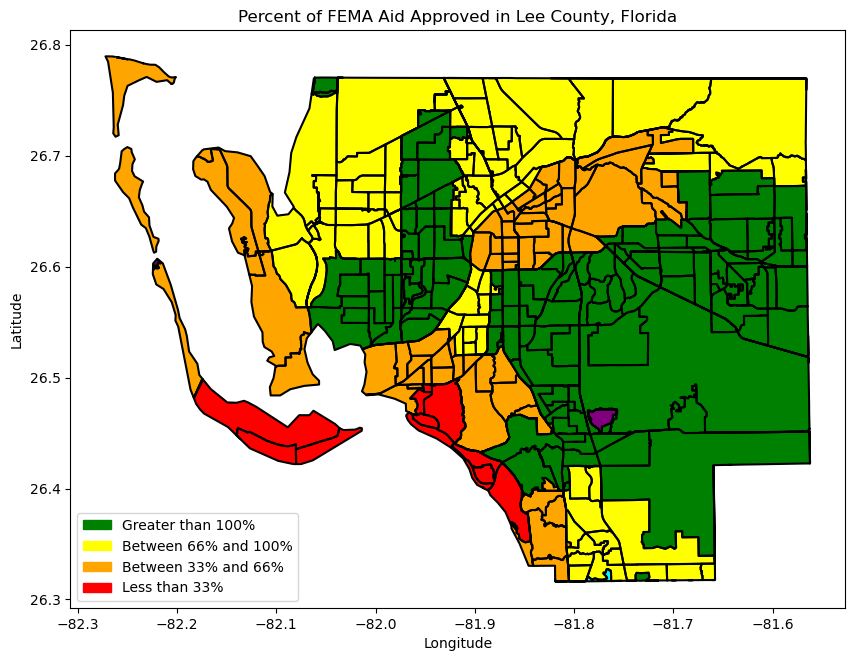

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percent of FEMA Aid Approved in Lee County, Florida")

joint_tracts_zip.boundary.plot(ax=ax, edgecolor='black')
joint_tracts_zip.plot(ax=ax, color=damage_colors)

zone1 = mpatches.Patch(color='green', label='Greater than 100%')
zone3 = mpatches.Patch(color='yellow', label='Between 66% and 100%')
zone4 = mpatches.Patch(color='orange', label='Between 33% and 66%')
zone5 = mpatches.Patch(color='red', label='Less than 33%')
plt.legend(handles=[zone1, zone3, zone4, zone5], loc="lower left")
plt.show()

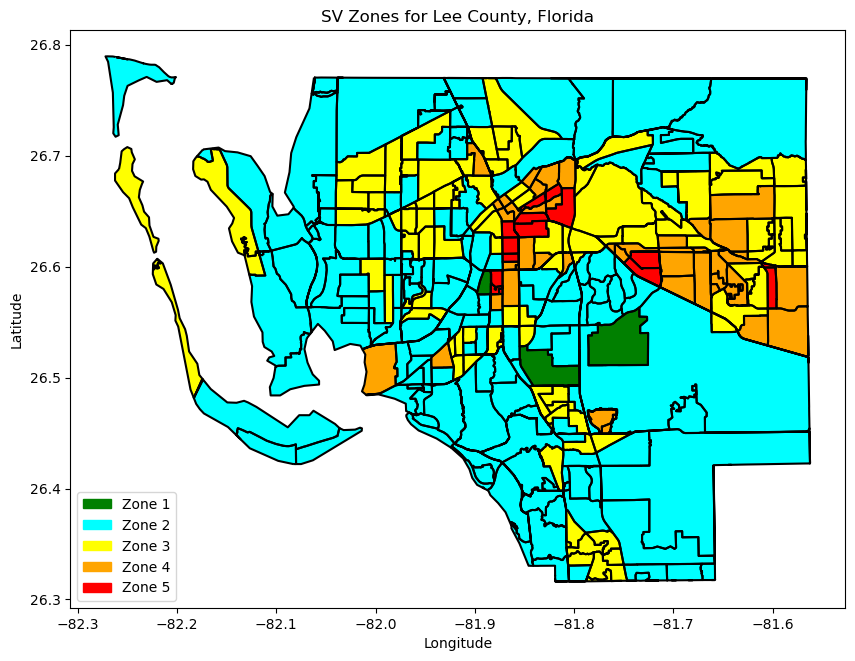

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("SV Zones for Lee County, Florida")

joint_tracts_zip.boundary.plot(ax=ax, edgecolor='black')
joint_tracts_zip.plot(ax=ax, color=sv_zone_colors)

zone1 = mpatches.Patch(color='green', label='Zone 1')
zone2 = mpatches.Patch(color='cyan', label='Zone 2')
zone3 = mpatches.Patch(color='yellow', label='Zone 3')
zone4 = mpatches.Patch(color='orange', label='Zone 4')
zone5 = mpatches.Patch(color='red', label='Zone 5')
plt.legend(handles=[zone1, zone2, zone3, zone4, zone5], loc="lower left")
plt.show()

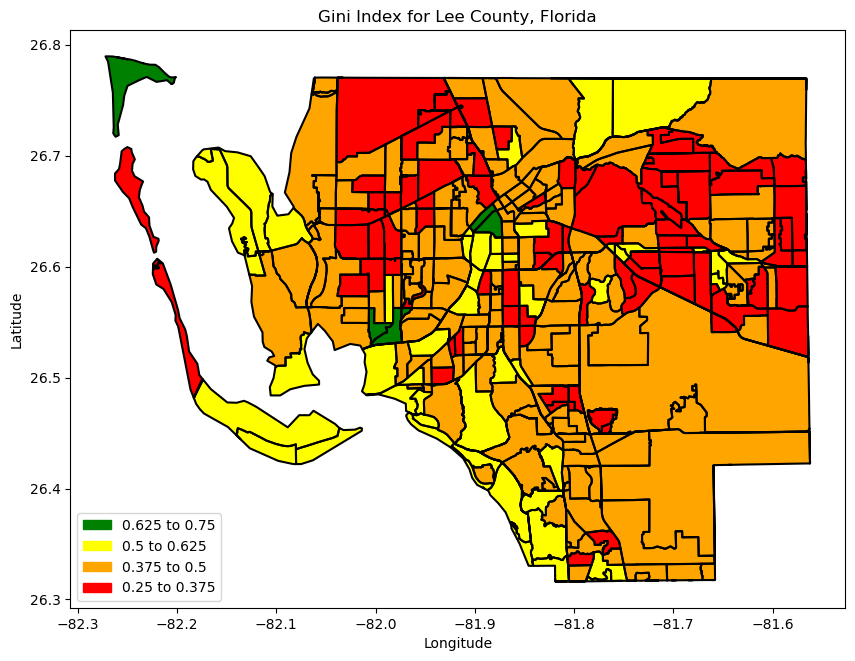

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Gini Index for Lee County, Florida")

joint_tracts_zip.boundary.plot(ax=ax, edgecolor='black')
joint_tracts_zip.plot(ax=ax, color=gini_colors)

zone1 = mpatches.Patch(label='0.625 to 0.75', color='green')
zone3 = mpatches.Patch(label='0.5 to 0.625', color='yellow')
zone4 = mpatches.Patch(label='0.375 to 0.5', color='orange')
zone5 = mpatches.Patch(label='0.25 to 0.375', color='red')
plt.legend(handles=[zone1, zone3, zone4, zone5], loc="lower left")
plt.show()

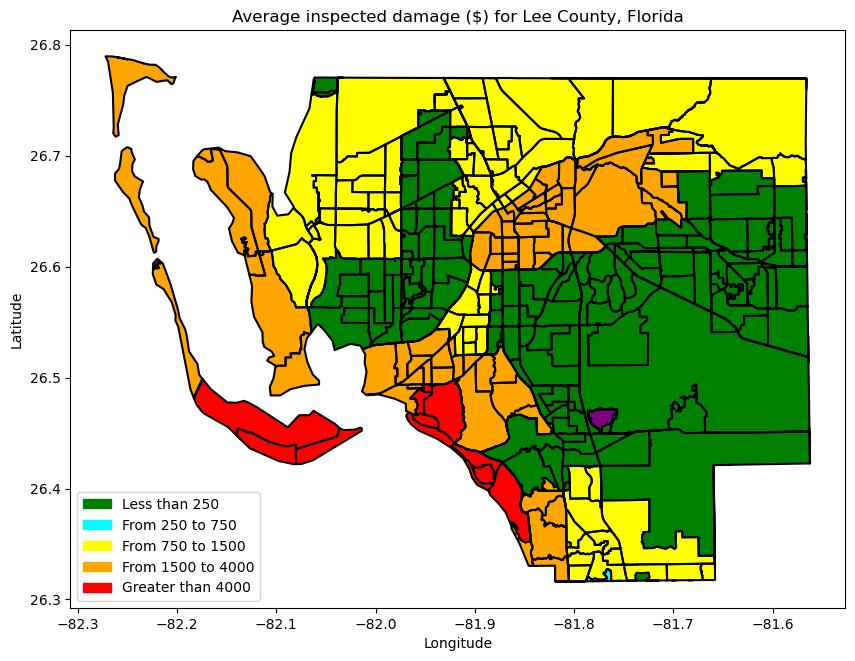

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Average inspected damage ($) for Lee County, Florida")

joint_tracts_zip.boundary.plot(ax=ax, edgecolor='black')
joint_tracts_zip.plot(ax=ax, color=damage_colors)

zone1 = mpatches.Patch(label='Less than 250', color='green')
zone2 = mpatches.Patch(label='From 250 to 750', color='cyan')
zone3 = mpatches.Patch(label='From 750 to 1500', color='yellow')
zone4 = mpatches.Patch(label='From 1500 to 4000', color='orange')
zone5 = mpatches.Patch(label='Greater than 4000', color='red')
plt.legend(handles=[zone1, zone2, zone3, zone4, zone5], loc="lower left")
plt.show()